### Funciones
* **cdf(x)** Función de distribución $F(x)$

* **sf(x)** $1-F(x)$
* **pmf(x)** Función masa de probabilidad (V.A. Discretas)
* **pdf(x)** Función densidad de probabilidad (V.A. Continuas)
* **ppf(x)** Función inversa de cdf(x)
$$ppf(x) \neq \cfrac{1}{cdf(x)}$$

la **ppf(x)** nos permite obtener el valor correspondeinte a una probabilidad

## Distribución Binomial

In [1]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#!pip install scipy

#### Ejemplo
Estamos en clase 13 alumnos. se sabe por años anteriores que 1 de cada 5 alumnos prefiere clases online.
* ¿Cuál será el valor esperado de alumnos que prefueran clases online?
* ¿Cuál será la probabilidad de que como mucho no asistan presencial 5 alumnos el viernes?

In [3]:
n=13
p=1/5
X=ss.binom(n,p)

In [4]:
## Media 
X.mean()

2.6

In [5]:
X.cdf(5)

0.9699646767104

In [6]:
z=X.cdf(5)

In [7]:
X.ppf(z)

5.0

P[X=0]+P[X=1]+P[X=2]P[X=3]+P[X=4]


In [8]:
sum(X.pmf(x) for x in range(6)) #[0,6)

0.9699646767103985

Un jugador X encesta con probabilidad 0.55. Calcula la probablidad de que al tirar 100 veces enceste:
* 50 veces
* todas las veces
* Enceste al menos 33
* El valor esperado
* ¿Cuantas canatas encestera con probabilkidad  0.26? ## podrá salir un numero real


Apartado A
$$P[X=50]={100 \choose 50}  p^{50} (1-p)^{50} $$

$$P[X \geq 33]= 1 -P[X<33]=1-P[X \leq 32]$$

In [9]:
n=100
p=0.55
X=ss.binom(n,p)

In [10]:
1-X.cdf(33)

0.9999924350293264

In [11]:
X.sf(33)

0.9999924350293264

In [12]:
X.ppf(0.26)

52.0

In [13]:
n=13
p=1/5
X=ss.binom(n,p)

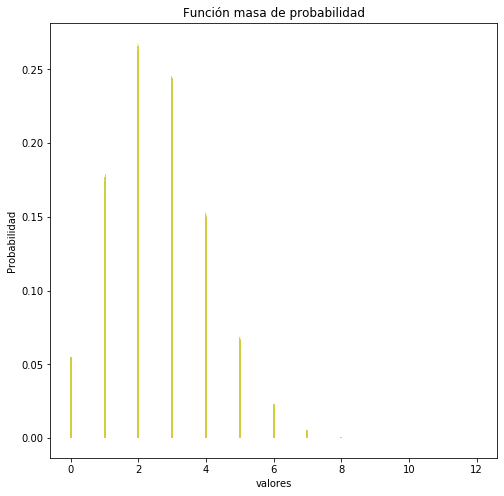

In [14]:
i= np.arange(13)
plt.figure(figsize=(8,8))
plt.title("Función masa de probabilidad")
plt.xlabel("valores")
plt.ylabel("Probabilidad")
plt.plot(i,X.pmf(i),"w--")
plt.vlines(i,0,X.pmf(i),"y")
plt.show();

## Distribución Hipergeometrica

$$ P[X=x]=\cfrac{{Np \choose n}{Nq \choose n-x}}{{n \choose x}} $$

En la academia hay 100 alumnos. Si de esos 100, 65 son mujeres. Si un dia vienen a a clase  10 personas y solo hay un hombre. ¿Cual es la probabilidad de que esto ocurra?

In [15]:
H=ss.hypergeom(100,10,35)##(N,n,Np)

In [16]:
H.pmf(1)

0.06463409846112038

In [17]:
H1=ss.hypergeom(100,10,65)
H1.pmf(9)

0.06463409846112038

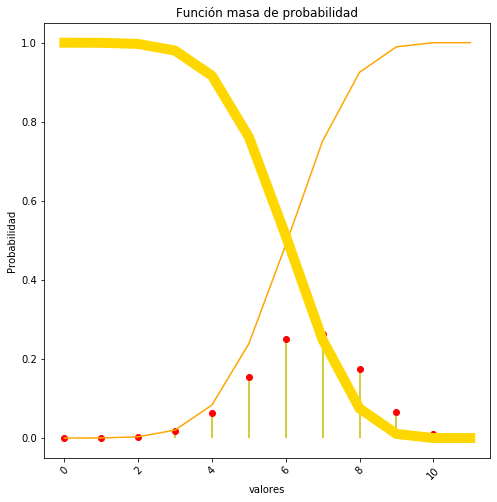

In [18]:
i= np.arange(12)
plt.figure(figsize=(8,8))
plt.title("Función masa de probabilidad")
plt.xlabel("valores")
plt.ylabel("Probabilidad")
plt.plot(i,H1.pmf(i),"ro")#r b g y w 
plt.vlines(i,0,H1.pmf(i),"y")
plt.plot(i,H1.cdf(i),color="orange")#r b g y w 
plt.plot(i,H1.sf(i),color="gold",lw=10)#r b g y w 
plt.xticks(rotation=45)
plt.show();

Diez refrigeradores de cierto tipo han sido devueltos a un distribuidor debido al a presencia de un ruido oscilante agudo cuando el refrigerador está funcionando. Supongamos que 4 de estos 10 refrigeradores tienen compresores defectuosos y los otros 6 tienen problemas más leves. Si se examinan al azar 5 de estos 10 refrigeradores, y se define la variable aleatoria X: “el número entre los 5 examinados que tienen un compresor defectuoso”. Indicar:

* La distribución de la variable aleatoria X
* La probabilidad de que no todos tengan fallas leves
* La probabilidad de que a lo sumo cuatro tengan fallas de compresor

In [19]:
H3=ss.hypergeom(10,5,6)

P[X<5]= P[X = 0] + P[X = 1] + P[X=2] + P[X = 3] + P[X = 4]

In [20]:
H3.pmf(0) + H3.pmf(1) + H3.pmf(2) + H3.pmf(3) + H3.pmf(4)

0.9761904761904762

In [21]:
H3.cdf(4)

0.9761904761904762

In [22]:
1-H3.pmf(5)

0.9761904761904762

P[defectuosas <= 4]

In [23]:
H4=ss.hypergeom(10,5,4)

In [24]:
H4.cdf(4)

1.0

## Geometrica

In [25]:
geo=ss.geom(0.3)

In [26]:
geo.cdf(5)

0.8319300000000001

In [27]:
x=np.arange(geo.ppf(.1),geo.ppf(.999999))
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.])

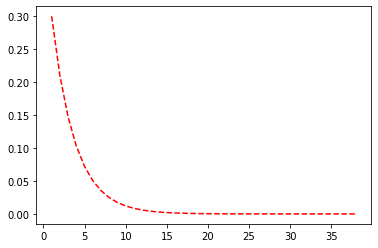

In [28]:
fpm=geo.pmf(x)
plt.plot(x,fpm,"r--");

## Distribución Poisson
Necesitamos
$$\lambda$$

In [29]:
P=ss.poisson(1.5)

In [30]:
P.cdf(1)

0.5578254003710748

In [31]:
P.sf(1)

0.4421745996289252

La probabilidad de que un virus entre en el cuerpo humano es de 0.01%.  Si hay 20.000 virus por $cm^3$ de aire que respiramos. 
* ¿Cuál será la rpobabilida de que 3 virus de esos 20.000 entren a una persona?

* ¿Cual será la porbabilidad de que al menos 10 virus de esos 20.000 entren a una persona?

* ¿Cuantos virus habrán entren en un persona con probabilidad 95.6%?







In [32]:
i

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

## Ejemplo

## Variables Continuas

### Uniforme

In [33]:
from scipy.stats import uniform
#import scipy.stats as ss

In [34]:
import matplotlib.pyplot as plt

In [35]:
import numpy as np

In [36]:
uniforme=uniform(0,120)

In [37]:
x=np.linspace(0,120,2)

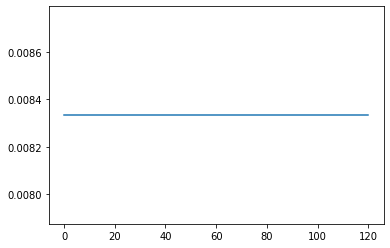

In [38]:
plt.plot(x,uniforme.pdf(x))

In [39]:
media,var,asi,curtosis=uniforme.stats(moments="mvsk")

In [40]:
media

array(60.)

In [41]:
var

array(1200.)

In [42]:
asi

array(0.)

In [43]:
curtosis

array(-1.2)

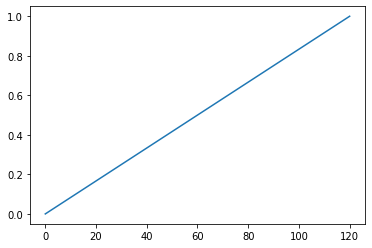

In [44]:
plt.plot(x,uniforme.cdf(x))

In [45]:
uniforme.ppf(0.50)

60.0

In [46]:
uniforme.ppf(0.99)

118.8

In [47]:
uniforme.cdf(118.8)

0.99

Un metro pasa cada 2 minutos. ¿cuál será la probabilidad de que espere a un metro entre 30 y 80 segundo?

In [48]:
uniforme.cdf(80)-uniforme.cdf(30)

0.41666666666666663

Un laser dispara su rayo cada 24h, si estoy deseando ver como se lanza el rayo, y llego a una hora X, 
* ¿qué probabilidad tengo de esperar ver el rayo entre 4 y 6 horas despues de mi llegada?
* ¿y entre 118 minutos y 243 minutos?
* ¿y entre 145 segundos y 987 segundos?
* ¿y qué sea superior a 890 minutos? 

In [49]:
a=0
b=24*60*60
x=uniform(a,b)
x.cdf(6*60*60)-x.cdf(4*60*60)

0.08333333333333334

In [50]:
x.cdf(243*60)-x.cdf(118*60)

0.08680555555555557

In [51]:
x.cdf(987)-x.cdf(145)

0.009745370370370371

In [52]:
x.sf(890*60)

0.3819444444444444

In [53]:
1-x.cdf(890*60)==x.sf(890*60)

True

In [54]:
from scipy.stats import expon

In [55]:
expon()

In [56]:
x_Expo=np.linspace(expon(2).ppf(0.01),expon(2).ppf(0.9999),100)
# x_Expo=np.linspace(2.6,5,100)

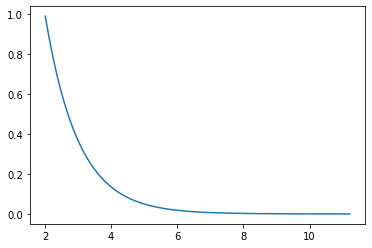

In [57]:
plt.plot(x_Expo,expon(2).pdf(x_Expo))

In [58]:
x_Expo

array([ 2.01005034,  2.10298256,  2.19591478,  2.288847  ,  2.38177923,
        2.47471145,  2.56764367,  2.66057589,  2.75350812,  2.84644034,
        2.93937256,  3.03230478,  3.12523701,  3.21816923,  3.31110145,
        3.40403367,  3.4969659 ,  3.58989812,  3.68283034,  3.77576257,
        3.86869479,  3.96162701,  4.05455923,  4.14749146,  4.24042368,
        4.3333559 ,  4.42628812,  4.51922035,  4.61215257,  4.70508479,
        4.79801701,  4.89094924,  4.98388146,  5.07681368,  5.1697459 ,
        5.26267813,  5.35561035,  5.44854257,  5.54147479,  5.63440702,
        5.72733924,  5.82027146,  5.91320368,  6.00613591,  6.09906813,
        6.19200035,  6.28493257,  6.3778648 ,  6.47079702,  6.56372924,
        6.65666147,  6.74959369,  6.84252591,  6.93545813,  7.02839036,
        7.12132258,  7.2142548 ,  7.30718702,  7.40011925,  7.49305147,
        7.58598369,  7.67891591,  7.77184814,  7.86478036,  7.95771258,
        8.0506448 ,  8.14357703,  8.23650925,  8.32944147,  8.42

In [59]:
media,var,asi,curtosis=expon(2).stats(moments="mvsk")

In [60]:
media

array(3.)

In [61]:
var

array(1.)

In [62]:
asi

array(2.)

El tiempo de vida de una moto sigue una `distribución exponencial` con media 2 lustros y medio. se pide:
* Probabilidad de que una moto comprada recientemente (de primera mano) dure más de 20 años.
* Si la moto lleva funcionando cinco años ¿cuál será la probabilidad de que haya que cambiarla antes de 2 decadas y media?

$$P[X\geq 20 ]=1-P[\leq 20]=$$

$$P[x \geq 25 / x \geq 5] =1-P[x \leq 25 / x \geq 5]= 1-\cfrac{P[x\leq 25]-P[x \leq 5]}{P[x \geq 5]}=1-P[x \leq 20]$$

In [63]:
(expon(1/12.5).cdf(25)-expon(1/12.5).cdf(5))/(expon(1/12.5).sf(5))

0.9999999979388444

In [64]:
expon(1/12.5).cdf(20)

0.999999997767179

# Distribución Normal

In [65]:
mu=10
sigma=5

In [66]:
from scipy.stats import norm

In [67]:
normal=norm(mu,sigma)

In [91]:
media, var, asi,curt=norm.stats(mu,sigma,moments='mvsk')
print(media)
print(var)
print(asi)
print(curt)

10.0
25.0
0.0
0.0


In [69]:
normal.pdf(2)

0.02218416693589111

In [70]:
normal.pdf(18)

0.02218416693589111

In [71]:
print(normal.pdf(8))
print(normal.pdf(12))

0.07365402806066466
0.07365402806066466


In [72]:
x=np.linspace(normal.ppf(0.01),normal.ppf(0.99),100)

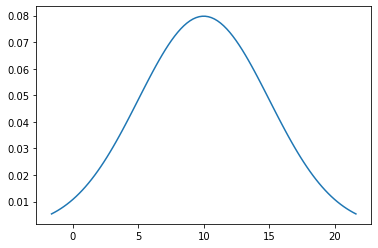

In [75]:
plt.plot(x,normal.pdf(x));

## Ejemplo clase
Sabiendo que las ventas diarias de un comercio en una temporada determinada tienen una distribución normal de media 1500 euros y desviación típica 300 euros, supere los 1600 euros
$P[X>1600]=\ldots$

$\chi^2$

In [76]:
from scipy.stats import chi2
gl=5
chi_cuadrado=chi2(gl)

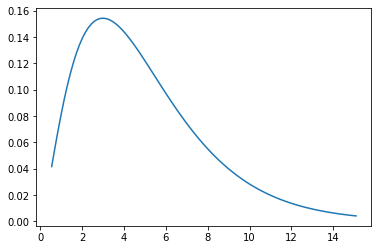

In [78]:
x=np.linspace(chi_cuadrado.ppf(0.01),chi_cuadrado.ppf(0.99),100)
plt.plot(x,chi_cuadrado.pdf(x))


In [90]:
media, var, asi,curt=chi2.stats(5,moments='mvsk')
print(media)
print(var)
print(asi)
print(curt)

5.0
10.0
1.2649110640673518
2.4


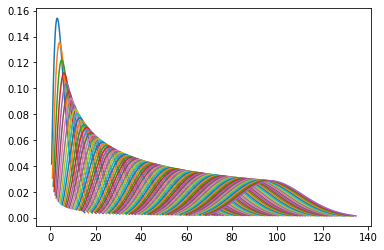

In [79]:
for i in range(5,100):
    chi_cuadrado=chi2(i)
    x=np.linspace(chi_cuadrado.ppf(0.01),chi_cuadrado.ppf(0.99),100)
    plt.plot(x,chi_cuadrado.pdf(x))

In [80]:
from scipy.stats import t

In [81]:
tstudent=t(5)

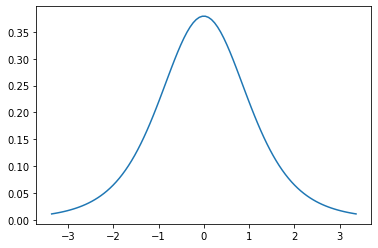

In [82]:
x=np.linspace(tstudent.ppf(0.01),tstudent.ppf(0.99),100)
plt.plot(x,tstudent.pdf(x))

In [85]:
media, var, asi,curt=t.stats(5,moments='mvsk')

In [86]:
media

array(0.)

In [87]:
var

array(1.66666667)

In [88]:
asi

array(0.)

In [89]:
curt

array(6.)

## Chi cuadrado

In [111]:
for i in range(4,95001):
    curtosis=chi2.stats(i,moments='k')
    if curtosis<0.01:
        print(i)
        break

1201


In [112]:
for i in range(4,95001):
    curtosis=t.stats(i,moments='k')
    if curtosis<0.01:
        print(i)
        break

C:\Users\Daniel Montes\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


605


In [113]:
from scipy.stats import f

In [114]:
gln, gld= 29, 14

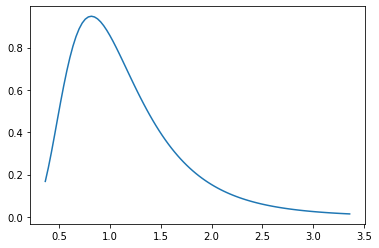

In [117]:
x=np.linspace(f.ppf(0.01,gln,gld),
             f.ppf(0.99,gln,gld),100)
plt.plot(x,f.pdf(x,gln,gld));

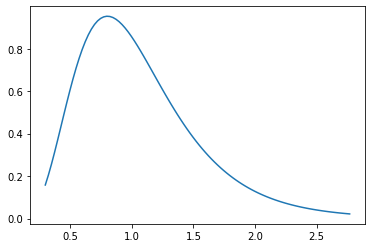

In [118]:
x=np.linspace(f.ppf(0.01,gld,gln),
             f.ppf(0.99,gld,gln),100)
plt.plot(x,f.pdf(x,gld,gln));

In [119]:
y=f.rvs(gln,gld,100)

In [ ]:
plt.

$$X ~N(\mu,\sigma)$$
$$P[X\leq 1305]=0.0256$$
$$P[X\geq 1600]=0.1587$$
Hago el cambio de variable
$$Z=\cfrac{X-\mu}{\sigma}$$

$$P[Z\leq \cfrac{1305-\mu}{\sigma}]=0.0256$$
$$P[Z\leq \cfrac{1600-\mu}{\sigma}]=1-0.1587$$

In [121]:
normal=norm(0,1)

In [122]:
z_1=normal.ppf(0.0256)
z_2=normal.ppf(1-0.1587)

In [123]:
z_1

-1.949799677735902

In [124]:
z_2

0.999815093614744

$$z_1 = \cfrac{1305-\mu}{\sigma}$$
$$z_2 = \cfrac{1600-\mu}{\sigma}$$

$$z_1 \times \sigma +\mu = 1305$$
$$z_2 \times \sigma + \mu =1600$$

In [128]:
A=np.array([[z_1,1],[z_2,1]])
b=np.array([1305,1600])

In [129]:
x=np.linalg.solve(A,b)

In [131]:
x[1]

1500.0054327496832

$$P[1450\leq X \leq 1550]=P[X\leq 1550]-P[X\leq 1450]$$

In [132]:
Normal=norm(x[1],x[0])

In [133]:
Normal.cdf(1550)-Normal.cdf(1450)

0.38287894648150667

In [135]:
print("La probabilidad de que un trabajador trabaje .. es: {0:0.2f}%".\
      format((Normal.cdf(1550)-Normal.cdf(1450))*100))

La probabilidad de que un trabajador trabaje .. es: 38.29%


In [138]:
gln, gld= 6, 8

In [143]:
xx=np.array([0.01,0.025,0.05,0.10,0.90,0.95,0.975,0.99])
f_snedecor=[]
t_stdundent=[]
chi_2=[]
for i in xx:
    f_snedecor.append(f.ppf(i,gln,gld))
    t_stdundent.append(t(5).ppf(i))
    chi_2.append(chi2(5).ppf(i))
import pandas as pd
rr=pd.DataFrame({"Percentiles":xx,"F_Snedecor":f_snedecor,"t_Student":t_stdundent,"Chi2":chi_2})

In [144]:
rr.set_index("Percentiles")

,F_Snedecor,t_Student,Chi2
Percentiles,,,
0.010,0.123432,-3.364930,0.554298
0.025,0.178583,-2.570582,0.831212
0.050,0.241150,-2.015048,1.145476
0.100,0.335229,-1.475884,1.610308
0.900,2.668335,1.475884,9.236357
0.950,3.580580,2.015048,11.070498
0.975,4.651696,2.570582,12.832502
0.990,6.370681,3.364930,15.086272
